In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import io

In [3]:
uploaded = files.upload()
wine_file = list(uploaded.keys())[0]
wine_df = pd.read_csv(io.BytesIO(uploaded[wine_file]))

print(wine_df.info())
print(wine_df.describe())

Saving wine_data.csv to wine_data (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   

In [4]:
# Questions 1: Most frequent wine quality & min/max quality
most_frequent_quality = wine_df["quality"].mode()[0]
min_quality = wine_df["quality"].min()
max_quality = wine_df["quality"].max()
print(f"Most Frequent Quality: {most_frequent_quality}, Min Quality: {min_quality}, Max Quality: {max_quality}")

Most Frequent Quality: 5, Min Quality: 3, Max Quality: 8


In [5]:
# Question 2: Correlation with quality
correlation_matrix = wine_df.corr()
fixed_acidity_corr = correlation_matrix.loc["fixed acidity", "quality"]
alcohol_corr = correlation_matrix.loc["alcohol", "quality"]
free_sulfur_corr = correlation_matrix.loc["free sulfur dioxide", "quality"]
print(f"Fixed Acidity Correlation: {fixed_acidity_corr}\nAlcohol Correlation: {alcohol_corr}\nFree Sulfur Dioxide Correlation: {free_sulfur_corr}")

Fixed Acidity Correlation: 0.12405164911322257
Alcohol Correlation: 0.4761663239995377
Free Sulfur Dioxide Correlation: -0.05065605724427594


In [6]:
# Question 3: Average residual sugar for best & lowest quality wines
best_quality_sugar = wine_df[wine_df["quality"] == max_quality]["residual sugar"].mean()
lowest_quality_sugar = wine_df[wine_df["quality"] == min_quality]["residual sugar"].mean()
print(f"Avg Residual Sugar (Best Quality): {best_quality_sugar}, (Lowest Quality): {lowest_quality_sugar}")

Avg Residual Sugar (Best Quality): 2.5777777777777775, (Lowest Quality): 2.6350000000000002


In [7]:
# Question 4: Effect of volatile acidity
volatile_acidity_corr = correlation_matrix.loc["volatile acidity", "quality"]
print(f"Volatile Acidity Correlation with Quality: {volatile_acidity_corr}")

Volatile Acidity Correlation with Quality: -0.390557780264006


In [8]:
# Question 5: Train Decision Tree & Random Forest Models
X = wine_df.drop(columns=["quality"])
y = wine_df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 55.94%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



In [10]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 65.94%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(120.72222222222221, 0.5, 'Actual')

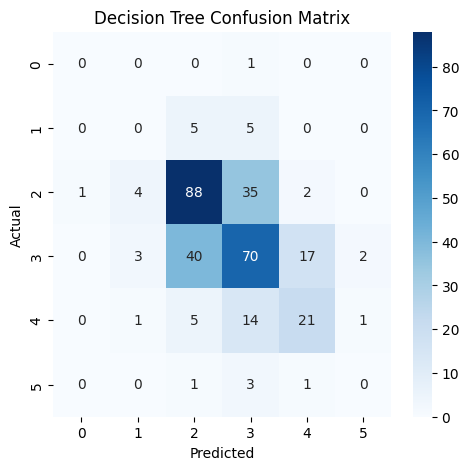

In [11]:
# Confusion Matrix for better visualization
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

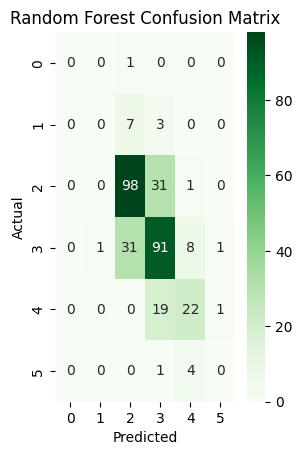

In [12]:
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()